In [1]:
import networkx as nx
from bokeh.io import show, output_notebook
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.MultiPlot import MultiPlot
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from operator import itemgetter
# Force matplotlib to not use any Xwindows backend.
matplotlib.use('Agg')
%matplotlib inline

no display found. Using non-interactive Agg backend


In [2]:
import pickle

In [3]:
path = "../DataSet StackOverflow/"

In [4]:
path_graph = "../DataSet StackOverflow/Graph_data/"

In [5]:
saved_path = "../DataSet StackOverflow/"

In [6]:
giant_path = "../DataSet StackOverflow/Graph_data/giant_component/"

In [7]:
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [20]:
BA = nx.read_graphml(path_graph+"BA_Network.graphml")
ER = nx.read_graphml(path_graph+"ER_Network.graphml")
WS = nx.read_graphml(path_graph+"WS_Network.graphml")

# Profile
il processo di diffusione parte da un insieme di nodi che hanno già adottato un determinato comportamento S, che è stato scelto in tre modi diversi: 
- A caso
- quelli più centrali
- quelli non appartenenti alla giant component (marginali)
- il più centrale per ogni community di louvain


VEDI I PARAMETRI _--------> Fraction infected ad esempio

In [8]:
def Profile(G, infected_nodes, blocked, adopter_rate, profile, iter_bunch):
    model = ep.ProfileModel(G)
    config = mc.Configuration()
    config.add_model_initial_configuration("Infected", infected_nodes)
    config.add_model_parameter('blocked', blocked)
    config.add_model_parameter('adopter_rate',adopter_rate)
    for i in G.nodes():
        config.add_node_configuration("profile", i, profile)
    model.set_initial_status(config)
    iterations = model.iteration_bunch(iter_bunch, node_status=True)
    trends = model.build_trends(iterations)
    vm = MultiPlot()

    viz = DiffusionTrend(model, trends)
    p = viz.plot()
    vm.add_plot(p)

    viz2 = DiffusionPrevalence(model, trends)
    p2 = viz2.plot()

    vm.add_plot(p2)
    m = vm.plot()
    show(m)

### 1) Caso nodi non appartenenti alla Giant component

In [10]:
giant = nx.read_graphml(giant_path+"Real Network.graphml")

In [11]:
nx.info(giant)

'Name: \nType: Graph\nNumber of nodes: 13699\nNumber of edges: 97818\nAverage degree:  14.2810'

In [12]:
marginal_nodes = []
for i in G.nodes():
    if i not in giant.nodes():
        marginal_nodes.append(i)

In [13]:
marginal_G = G.subgraph(marginal_nodes)

In [14]:
print(nx.info(marginal_G))

Name: 
Type: Graph
Number of nodes: 81
Number of edges: 74
Average degree:   1.8272


In [9]:
blocked = 0.1
adopter_rate = 0.001
profile = 0.10
iter_bunch = 10

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.80s/it]


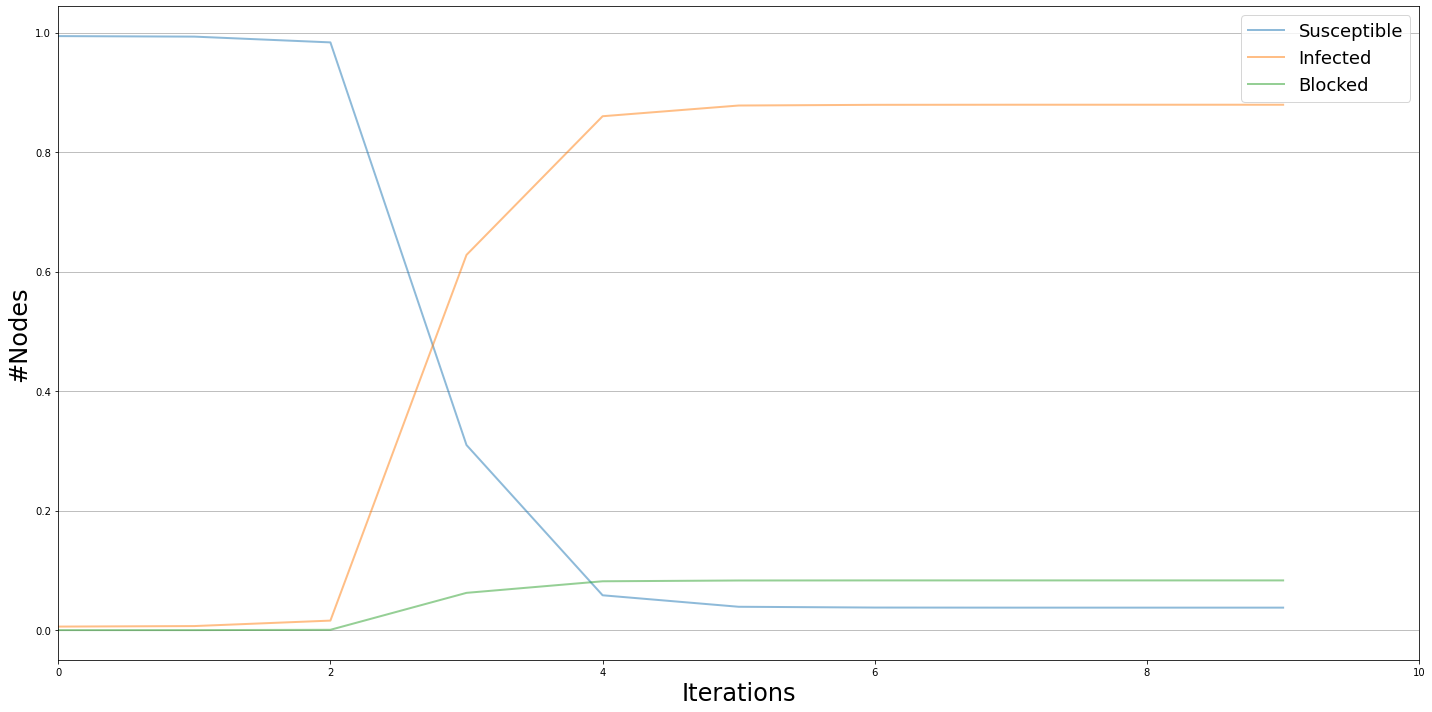

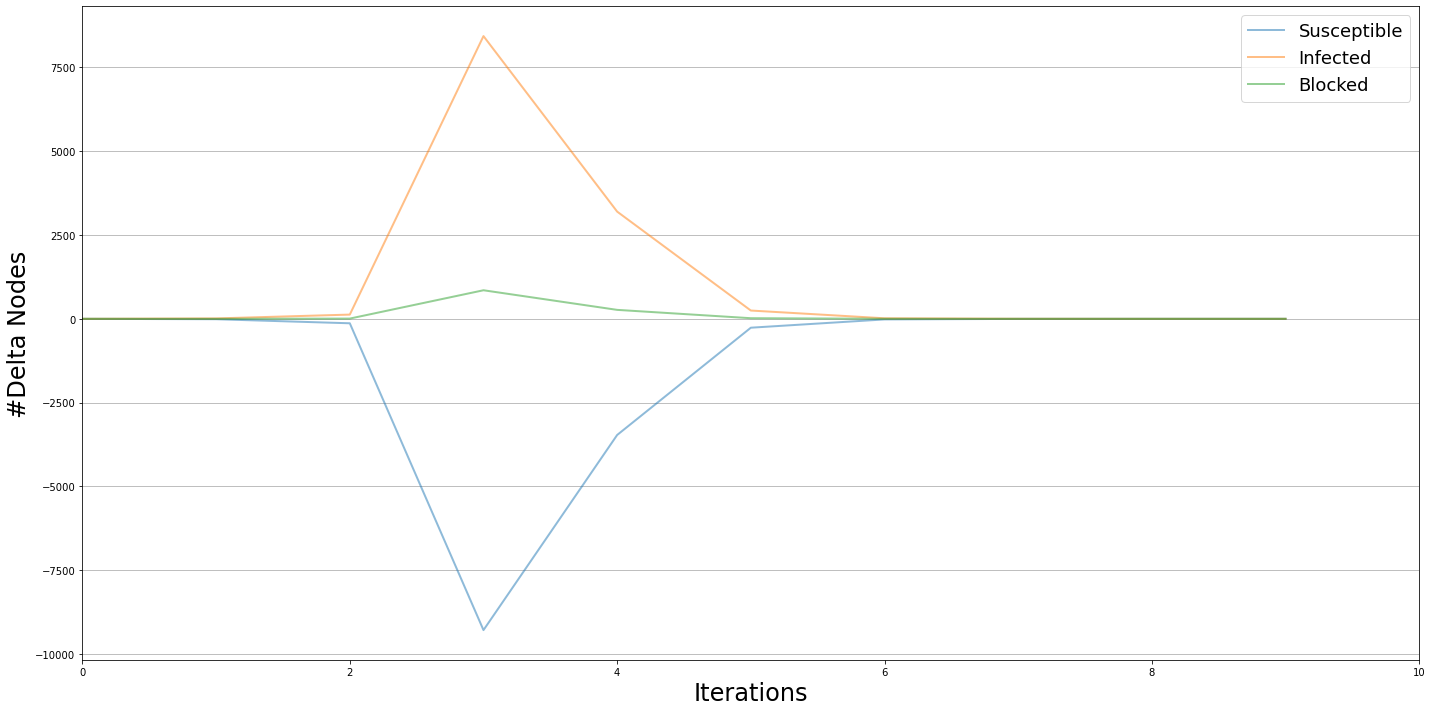

In [28]:
Profile(G, marginal_G.nodes(), blocked, adopter_rate, profile, iter_bunch)

### 2)  Caso nodi  più centrali

In [29]:
df = pd.read_csv("../DataSet StackOverflow/centrality_degree_nodes.csv")

In [30]:
infected_nodes = list(df["Id"][:8])

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:18<00:00,  1.85s/it]


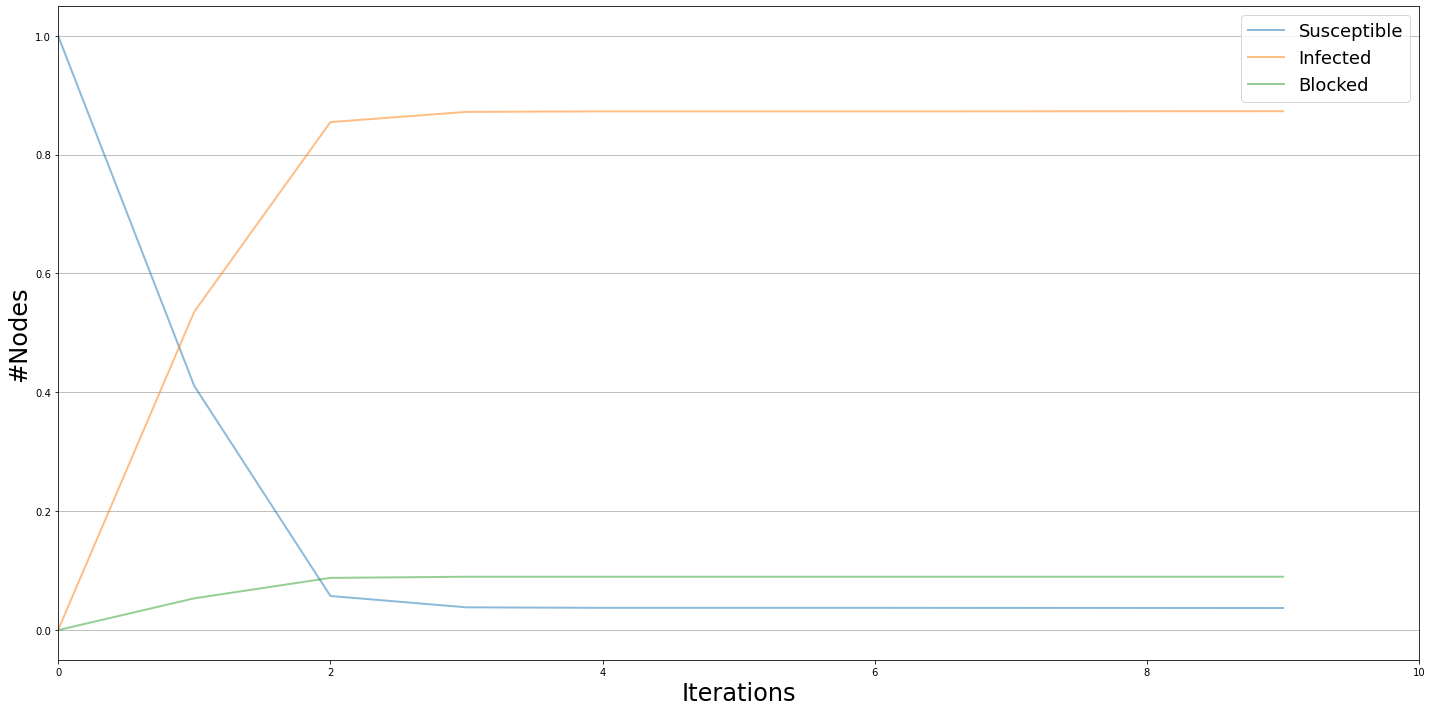

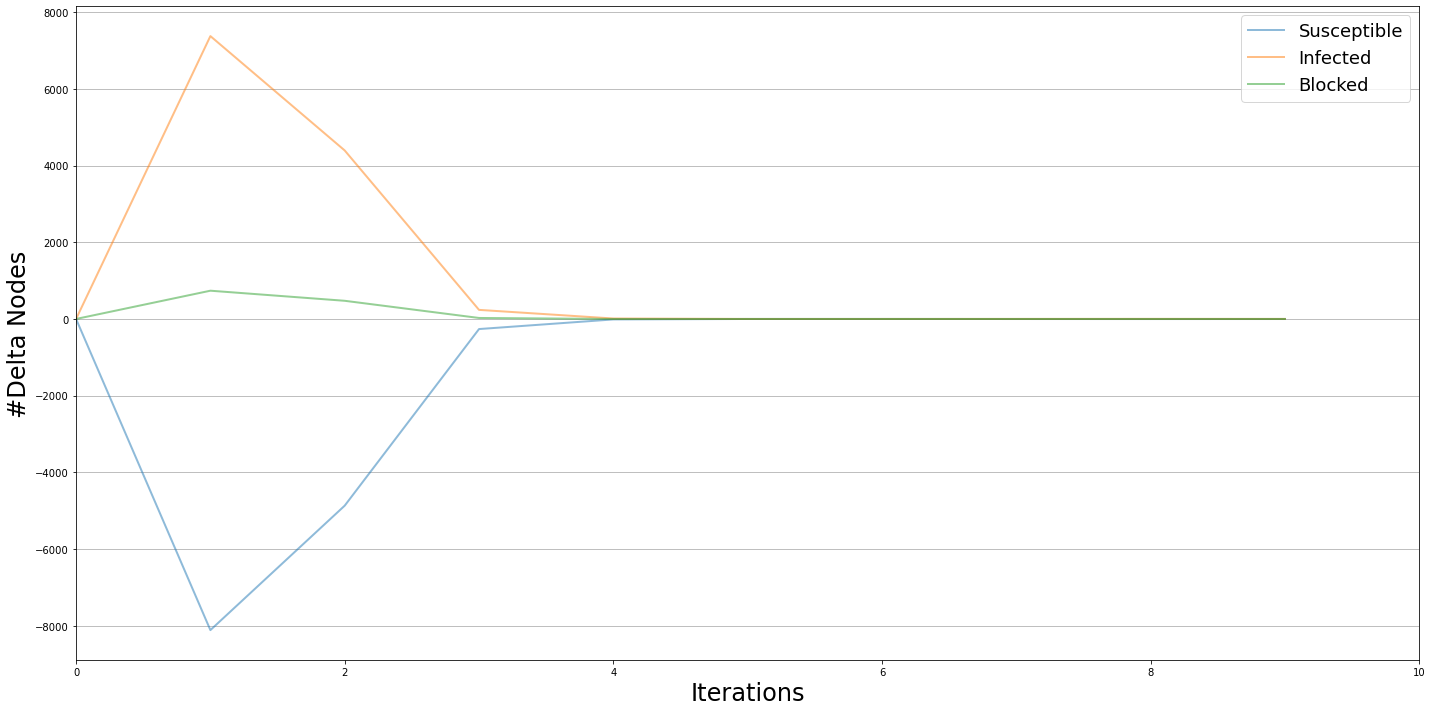

In [31]:
Profile(G, infected_nodes, blocked, adopter_rate, profile, iter_bunch)

### 3) Caso random

In [17]:
def Profile2(G, blocked, adopter_rate, fraction_infected, profile, iter_bunch):
    model = ep.ProfileModel(G)
    config = mc.Configuration()
    config.add_model_parameter('blocked', blocked)
    config.add_model_parameter('adopter_rate',adopter_rate)
    config.add_model_parameter('fraction_infected', fraction_infected)
    for i in G.nodes():
        config.add_node_configuration("profile", i, profile)
    model.set_initial_status(config)
    iterations = model.iteration_bunch(iter_bunch, node_status=True)
    trends = model.build_trends(iterations)
    vm = MultiPlot()

    viz = DiffusionTrend(model, trends)
    p = viz.plot()
    vm.add_plot(p)

    viz2 = DiffusionPrevalence(model, trends)
    p2 = viz2.plot()

    vm.add_plot(p2)
    m = vm.plot()
    show(m)

In [18]:
fraction_infected = 0.0006

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:27<00:00,  2.77s/it]


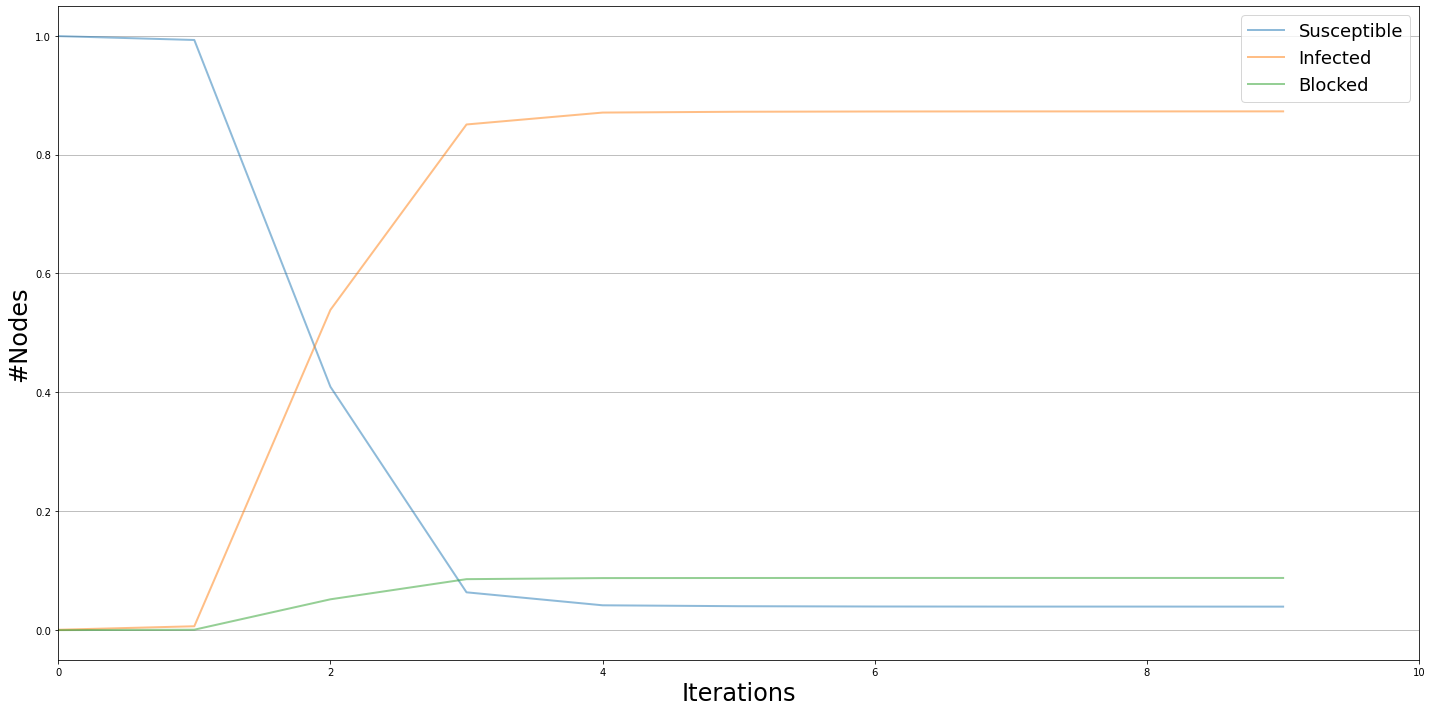

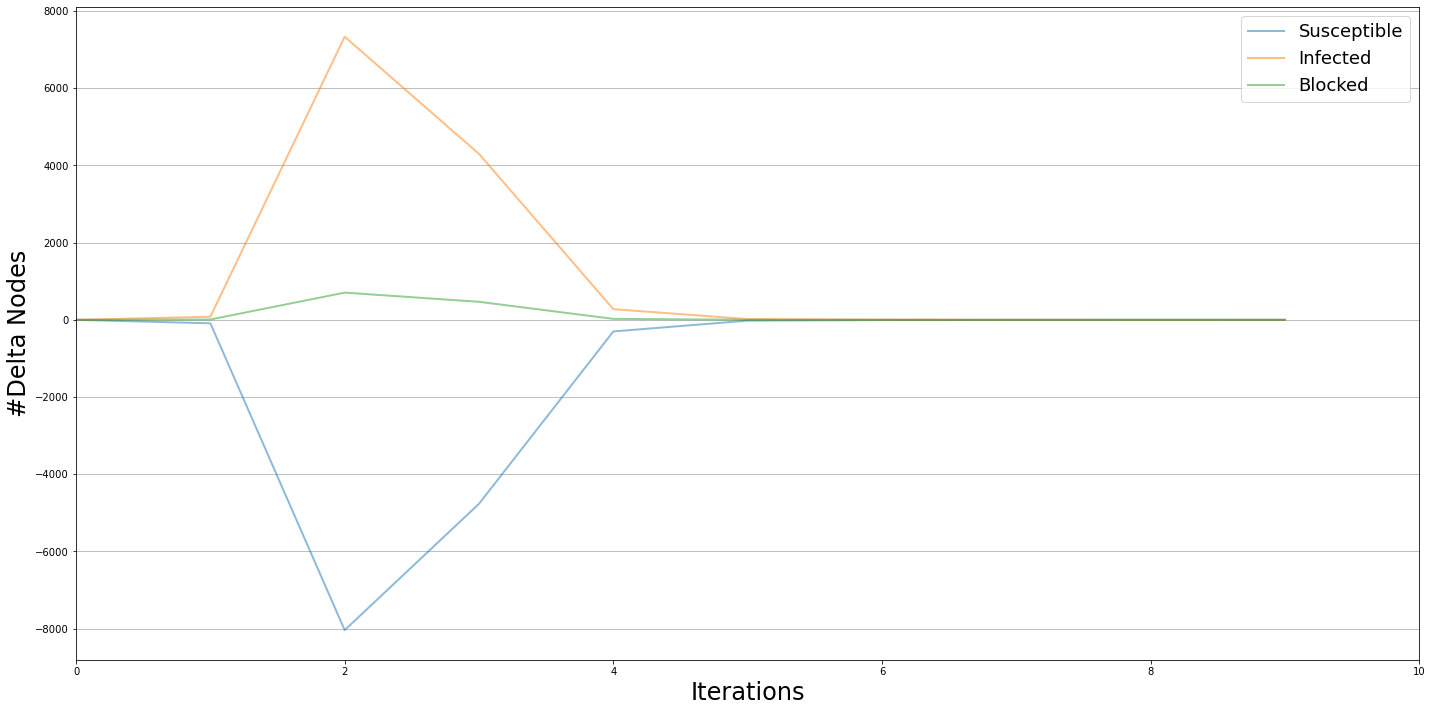

In [34]:
Profile2(G, blocked, adopter_rate, fraction_infected, profile, iter_bunch)

### 4) Caso il nodo più centrale di ogni community Louvain

In [10]:
community_path = "../DataSet StackOverflow/Community_task/"

In [11]:
with open(community_path+'louvain.pickle', 'rb') as f:
    louvain_coms = pickle.load(f)

In [12]:
sub_graphs = []
for i in louvain_coms.communities:
    sub_graphs.append(G.subgraph(i))

In [13]:
community_nodes = []
for i in sub_graphs:
    degree_centrality = nx.degree_centrality(i)
    sorted_degree = sorted(degree_centrality.items(), key = itemgetter(1), reverse = True)
    community_nodes.append(sorted_degree[0])

In [14]:
len(community_nodes)

49

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:35<00:00,  3.55s/it]


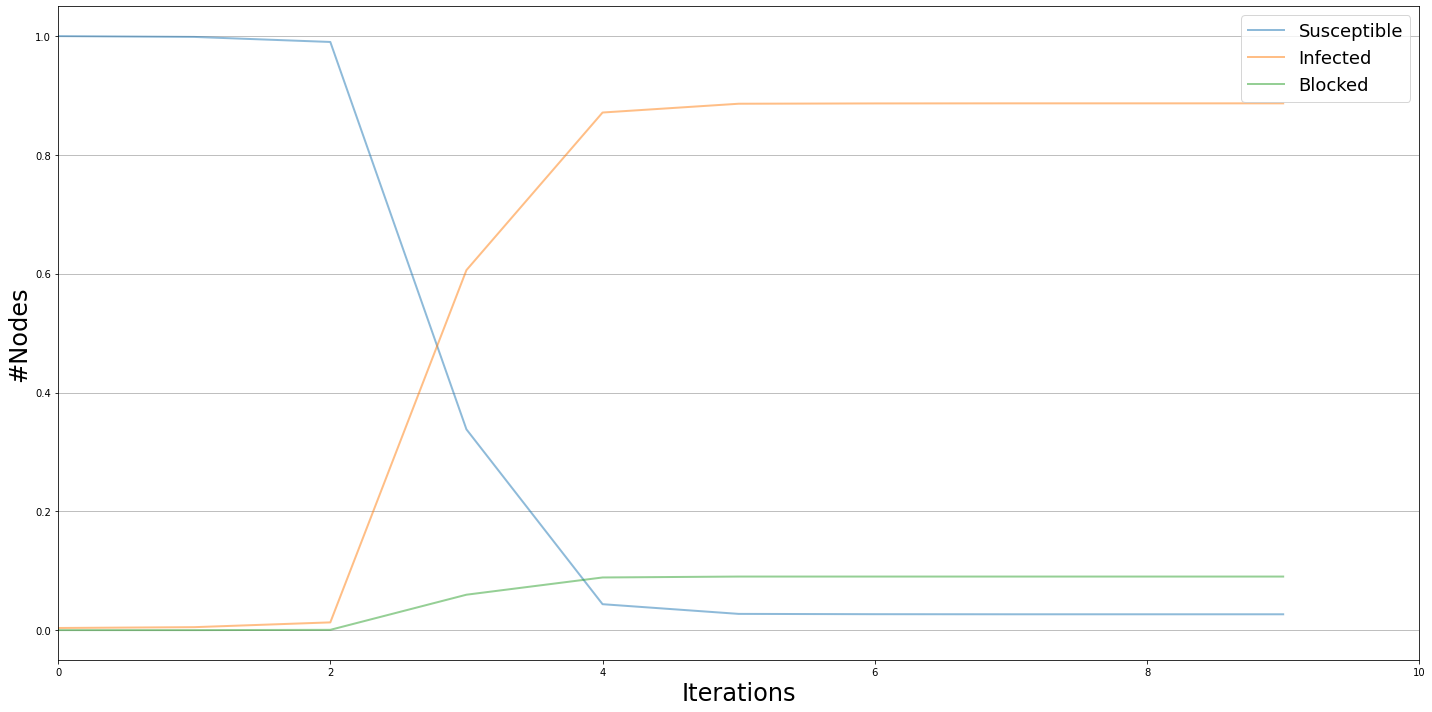

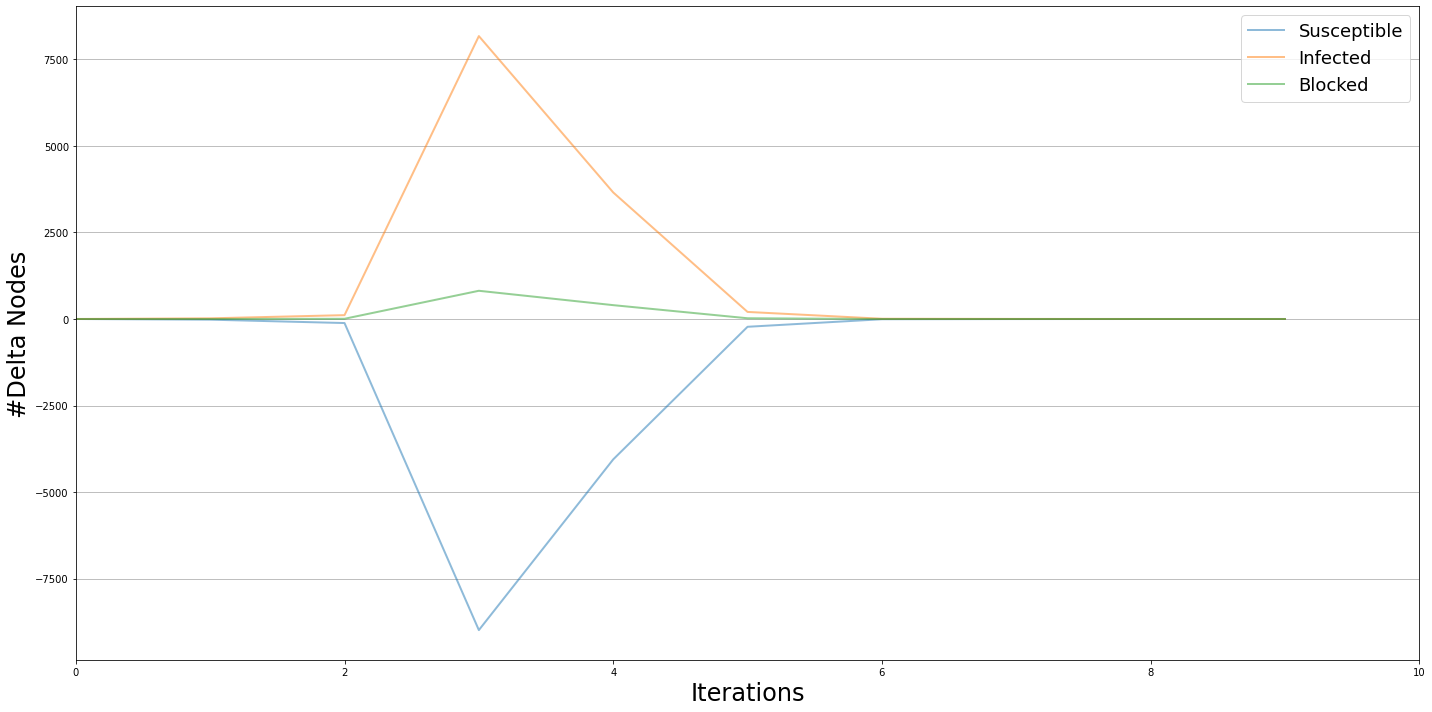

In [15]:
Profile(G, community_nodes, blocked, adopter_rate, profile, iter_bunch)

# Altri grafi

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:28<00:00,  2.87s/it]


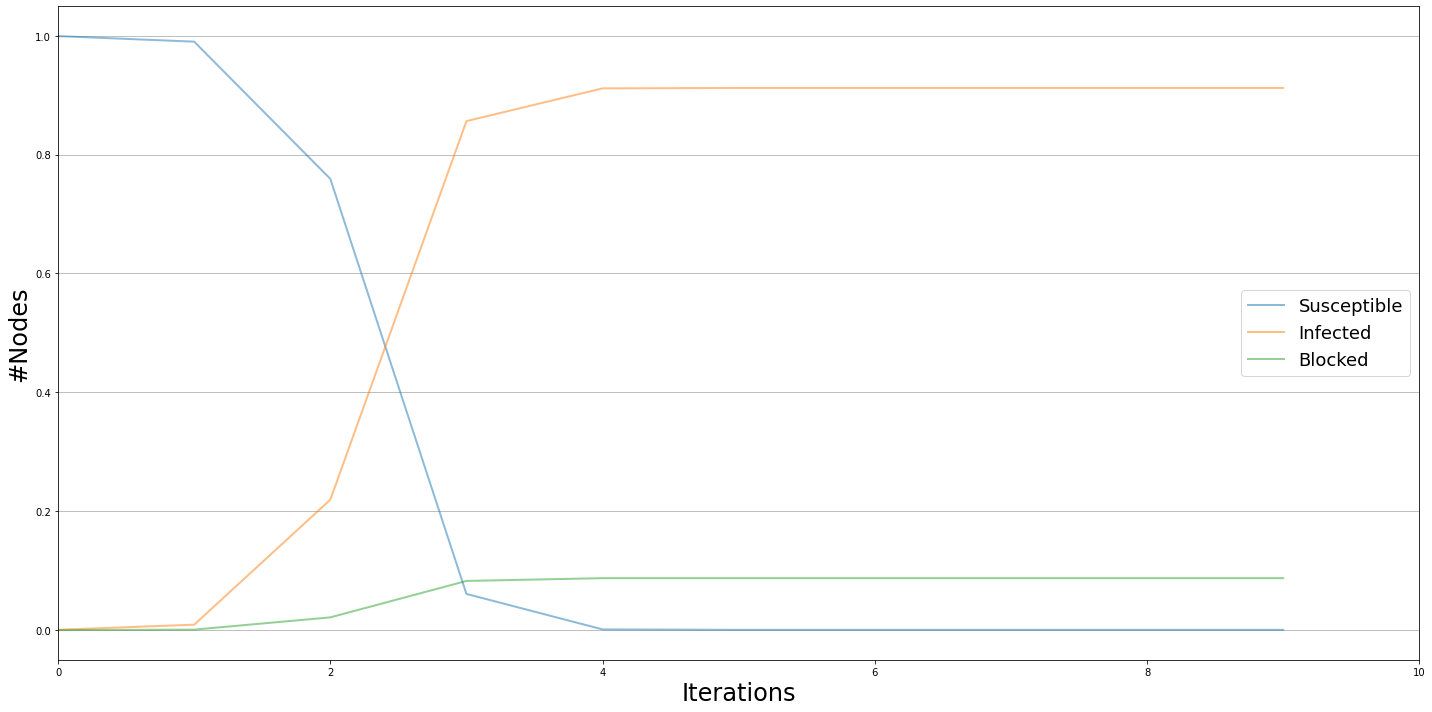

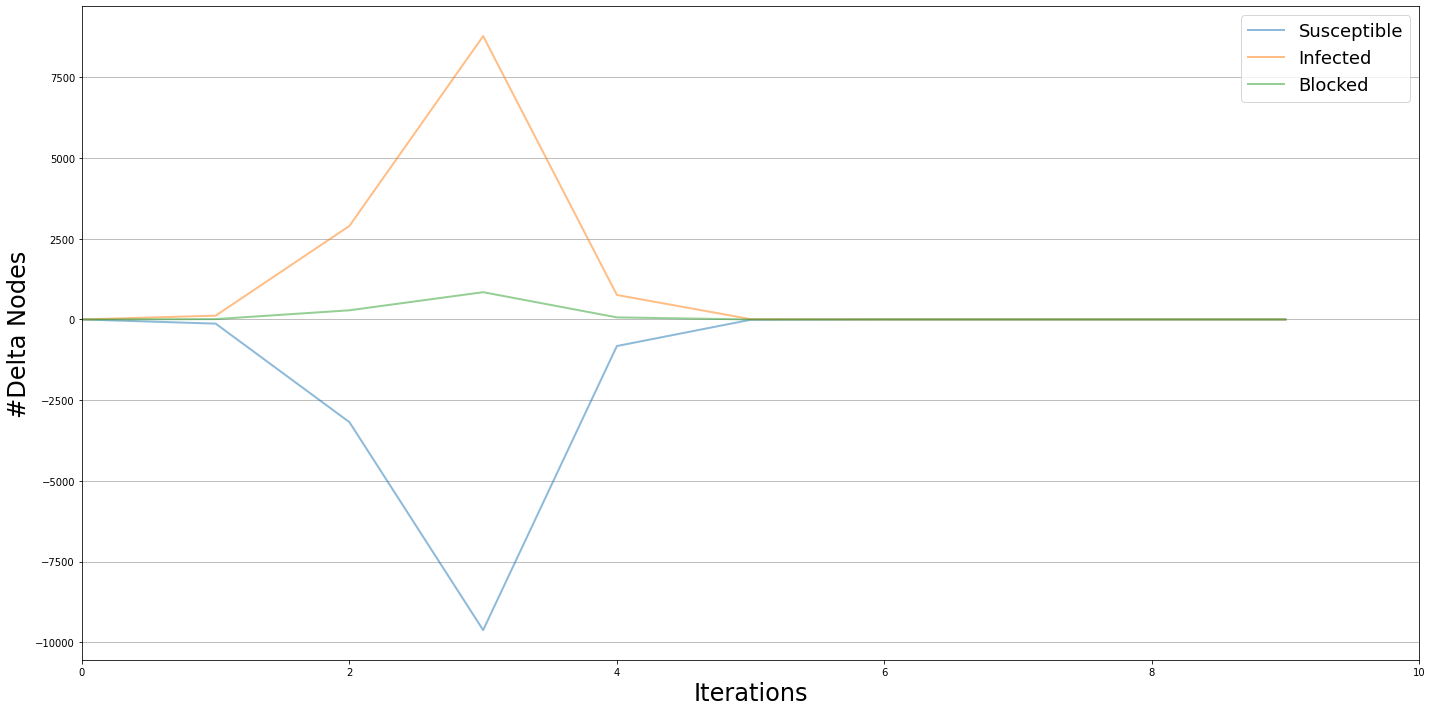

In [21]:
Profile2(BA, blocked, adopter_rate, fraction_infected, profile, iter_bunch)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:32<00:00,  3.22s/it]


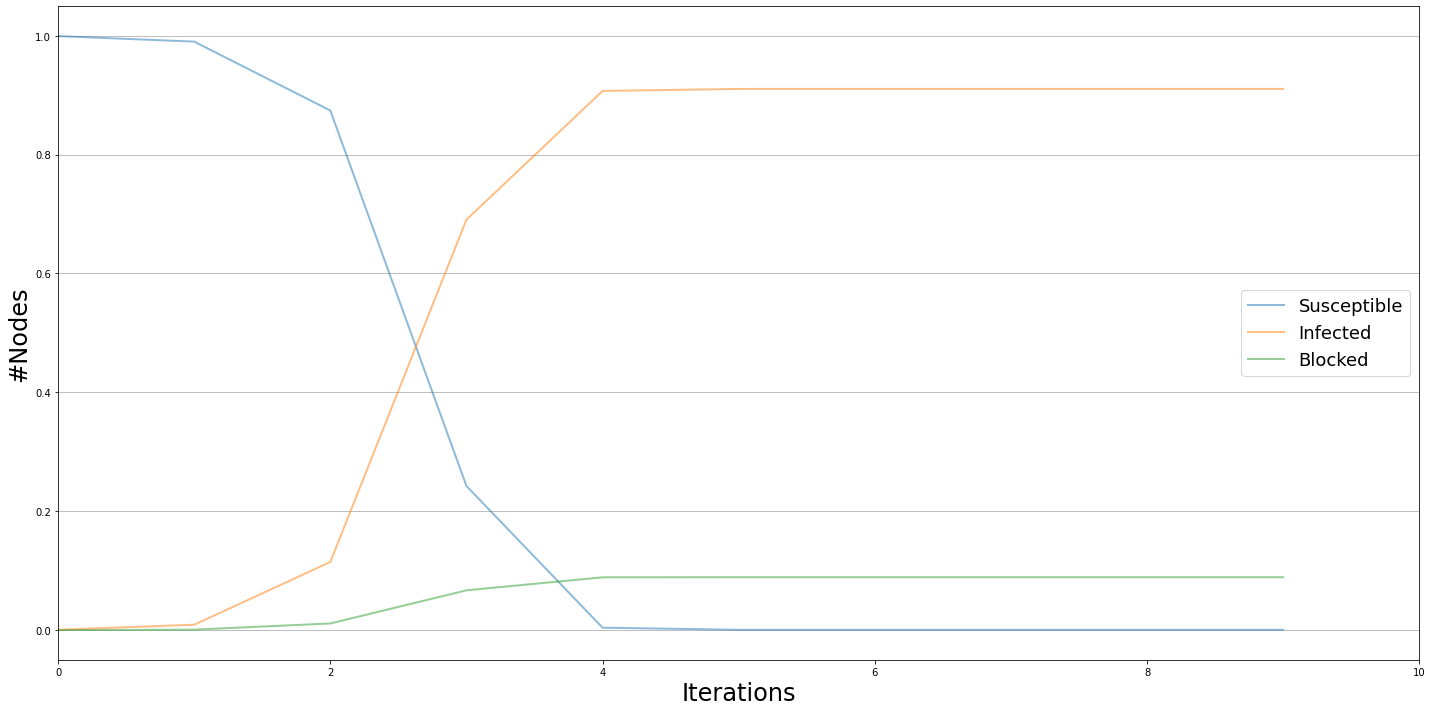

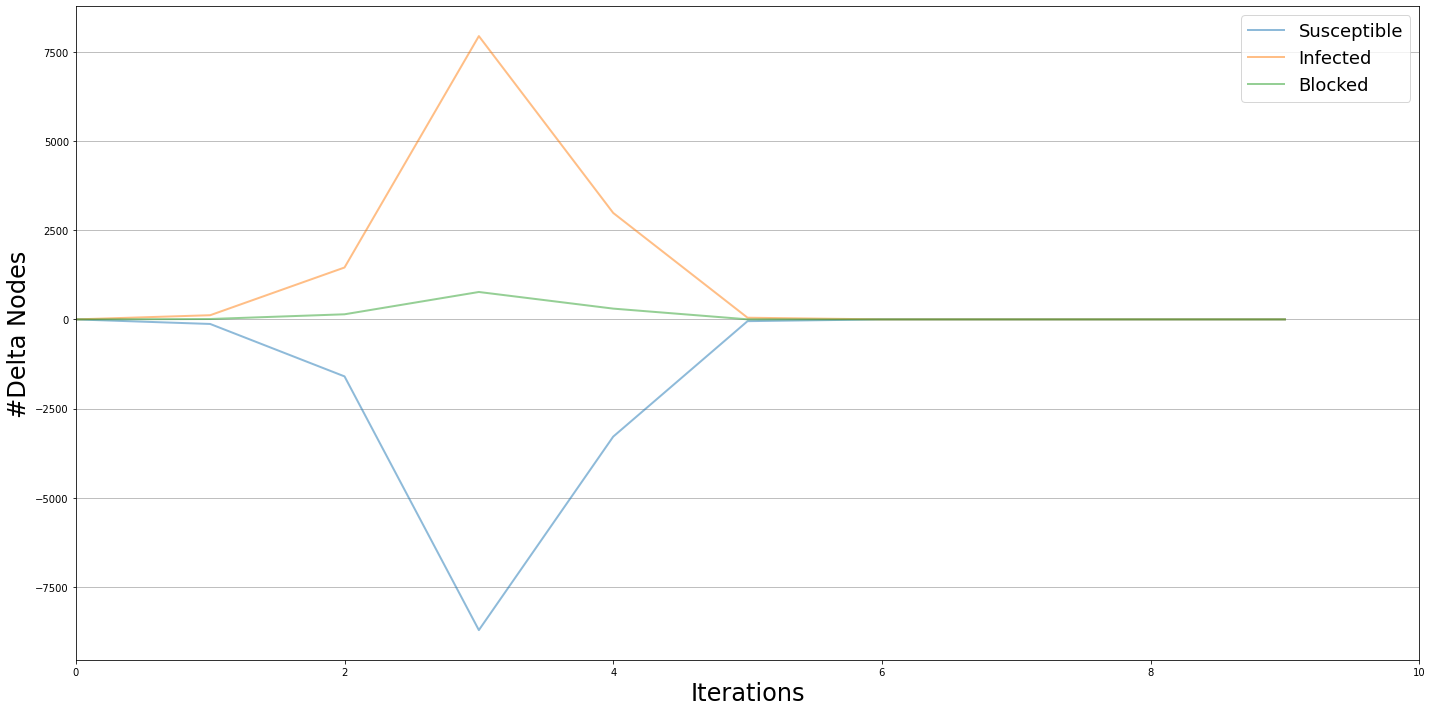

In [22]:
Profile2(ER, blocked, adopter_rate, fraction_infected, profile, iter_bunch)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.26s/it]


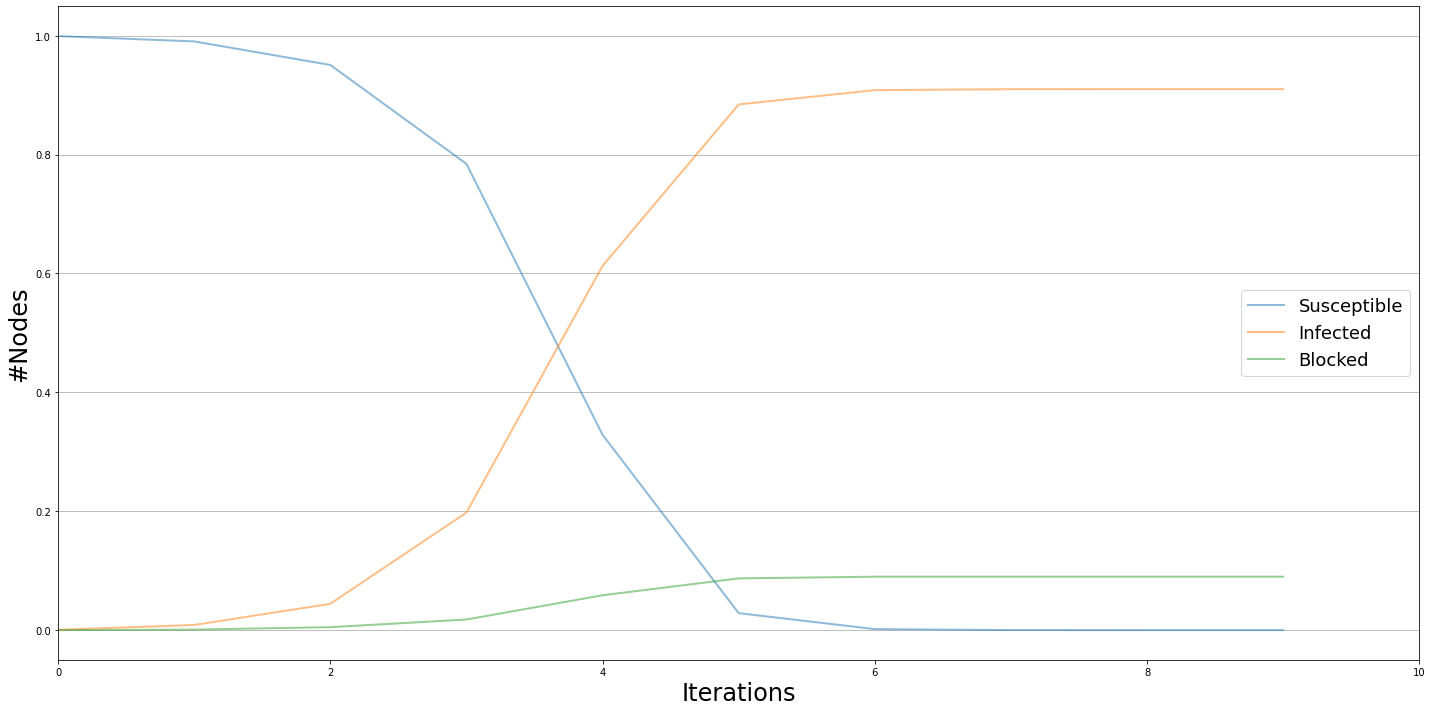

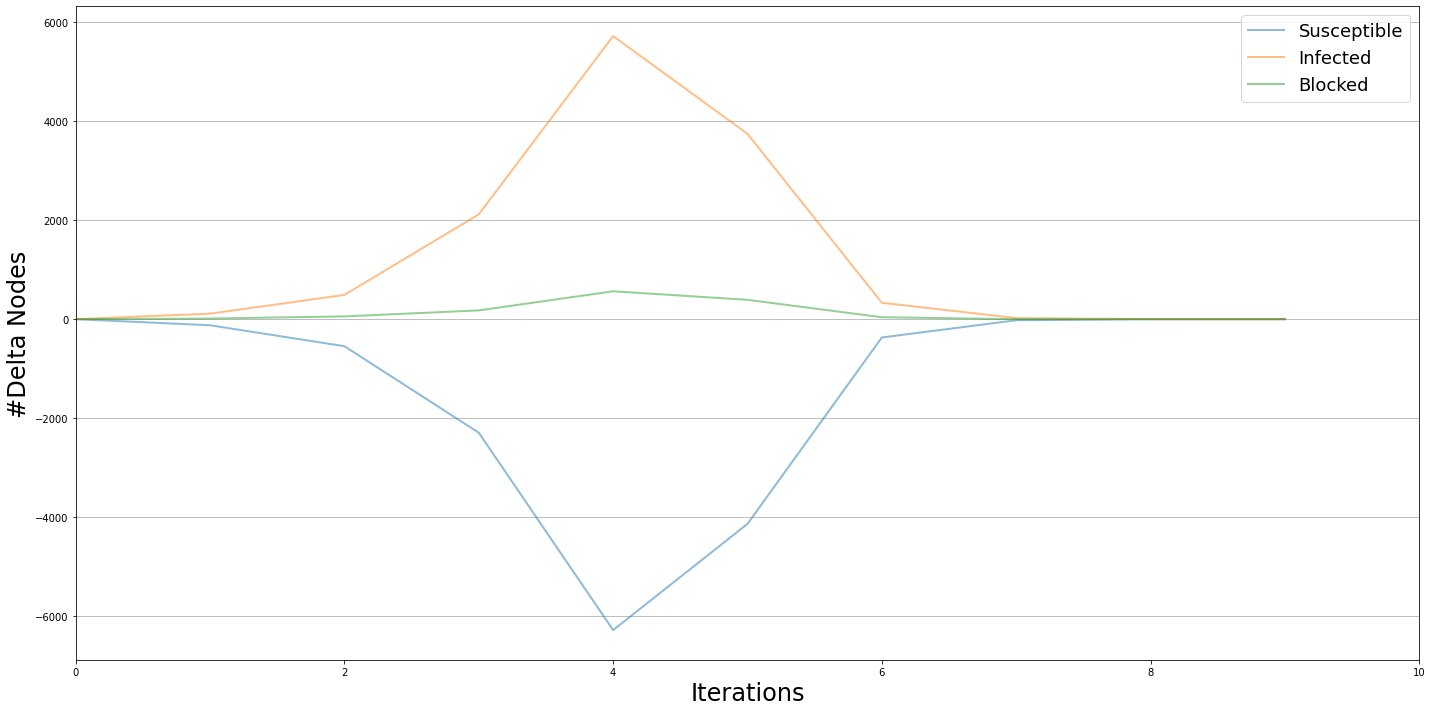

In [23]:
Profile2(WS, blocked, adopter_rate, fraction_infected, profile, iter_bunch)